In [2]:
%load_ext autoreload
%autoreload 2

import jax.numpy as jnp
from jax import jit, vmap, grad
from jax.lax import scan
from scipy.special import erfcx as sc_erfcx
from scipy.special import wofz as sc_wofz
from jax.scipy.special import erfc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

from exojax.spec import hjert
from exojax.special import erfcx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## these are samples for hjert

In [3]:
from jax import vmap
x=jnp.linspace(0.0,1.0,10)
vmap(hjert,(0,None),0)(x,1.0)

a=jnp.linspace(0.0,1.0,10)
vmap(hjert,(0,0),0)(x,a)

DeviceArray([1.        , 0.8764037 , 0.7615196 , 0.6596299 , 0.5718791 ,
             0.49766064, 0.43553388, 0.3837772 , 0.34069115, 0.3047442 ],            dtype=float32)

## exojax version of erfcx 

In [4]:
N=10000
xv=jnp.logspace(-5,5,N)
xvc=np.logspace(-5,5,N)
verfcx=vmap(erfcx)
#%timeit verfcx(xv)

In [5]:
d=(verfcx(xv) - sc_erfcx(xvc))/ sc_erfcx(xvc)

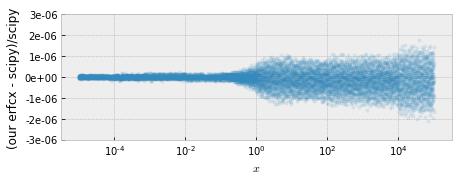

In [6]:
from matplotlib.ticker import FormatStrFormatter

fig=plt.figure(figsize=(7,2.3))
ax=fig.add_subplot(111)
ax.plot(xvc,d,".",alpha=0.1,rasterized=True)
ax.yaxis.set_major_formatter(FormatStrFormatter("%1.e"))
plt.ylabel("(our erfcx - scipy)/scipy")
plt.xscale("log")
plt.xlabel("$x$")
plt.ylim(-3.e-6,3.e-6)
plt.savefig("erfcx.pdf", bbox_inches="tight", pad_inches=0.0)

## comparison with scipy.special.wofz

In [17]:
Na=300
#vl=-1
#vm=3.3
vl=-3
vm=5
xarrv=jnp.logspace(vl,vm,Na)
xarr=xarrv[:,None]*jnp.ones((Na,Na))
aarrv=jnp.logspace(vl,vm,Na)
aarr=aarrv[None,:]*jnp.ones((Na,Na))

#scipy
def H(a,x):
    z=x+(1j)*a
    w = sc_wofz(z)
    return w.real

# hjert
def vhjert(a):
    return vmap(hjert,(0,None),0)(xarrv,a)
vvhjert=jit(vmap(vhjert,0,0))

In [18]:
%timeit hjert(0.1,0.1)

390 µs ± 17.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


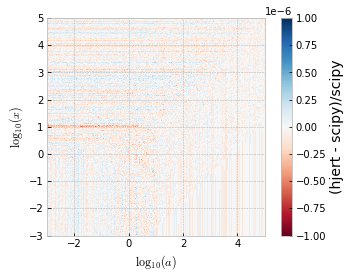

In [19]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
fig=plt.figure()
ax=fig.add_subplot(111)
c=ax.imshow((vvhjert(aarrv).T-H(aarr,xarr))/H(aarr,xarr),vmin=-1.e-6,vmax=1.e-6,
            cmap="RdBu",extent=([vl,vm,vm,vl]),rasterized=True)
plt.gca().invert_yaxis()
plt.ylabel("$\log_{10}(x)$")
plt.xlabel("$\log_{10}(a)$")
cb=plt.colorbar(c)
cb.formatter.set_powerlimits((0, 0))
cb.set_label("(hjert - scipy)/scipy",size=14)
plt.savefig("hjert.pdf", bbox_inches="tight", pad_inches=0.0)

In [20]:
hjert(0.0,0.1)

Buffer(0.8964569, dtype=float32)

In [21]:
erfcx(0.1)

DeviceArray(0.8964569, dtype=float32)

In [33]:
# hjert
zhjert=(vmap(hjert,(None,0),0))
zerfcx=(vmap(erfcx,(0),0))

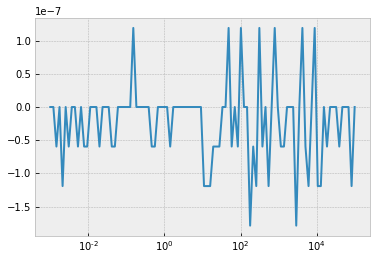

In [37]:
aarr=jnp.logspace(-3,5,100)
plt.plot(aarr,(zhjert(0.0,aarr)/zerfcx(aarr)-1.0))
plt.xscale("log")
